# Data Cleaning and Exploration


## Table of Contents:
1. [Important Information](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Important-Information)
2. [Unpickle the Data](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Unpickle-the-Data)    
3. [Initial Data Exploration](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Initial-Data-Exploration)    
4. [Data Cleaning](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Data-Cleaning)

If some output in this Jupyter notebook doesn't appear, check it out in this [nbviewer](https://nbviewer.org/github/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb).

## Important Information
### Prior to the Creation of this Script:
I have scraped the list of musicians from Wikipedia using wiki_musicians.py.  I manually cleaned the text file to remove double quotations ("") and parentheticals like "(performer)," "(musician)," and "(singer)," since it was manageable with just 111 artists.

I then retrieved lyrics from these artists from Genius.com using lyricsgenius_requests.ipynb, where 70+ artist-queries successfully returned JSON files.

Lastly, I created and pickled the lyrics data frame (or rough_df.pkl, not uploaded in the repo) in the [load_json_to_df.ipynb](https://github.com/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/2_load_json_to_df.ipynb) script, where an additional 8 artists could not be successfully loaded, due to entirely null lyrical entries.  This pickled data frame remains in my local repository.

The steps above were broken into multiple scripts to avoid re-running time-intensive queries.

### Progress Report Info:
This script represents the end of Progress Report 1 and the main body of Progress Report 2.  PR1 was split into multiple scripts/notebooks so that data collection steps wouldn't be re-run.

## Unpickle the Data

In [1]:
import pickle
f = open('../data/rough_df.pkl', 'rb')
lyricsdf = pickle.load(f)
f.close()

In [2]:
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,Bring It When You Come Lyrics\nTerrible things...
1,Abner Jay,Cocaine,Cocaine Lyrics\nFolk music is high-class music...
2,Abner Jay,Cocaine Blues,"Cocaine Blues LyricsCocaine, Cocaine\nRunning ..."
3,Abner Jay,Don’t Mess with Me Baby,Don’t Mess with Me Baby Lyrics\nTerrible thing...
4,Abner Jay,I cried,"I cried LyricsI, I cried\nI cried in the ni-ig..."


## Initial Data Exploration
Before cleaning, I'd like to see the status of the data: 
- how many artists are there,
- how many songs,
- how many lyrics are empty strings,
- how many are duplicates,
- and what is the artist distribution like?

In [3]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [4]:
lyricsdf.describe()

,artist,title,lyrics
count,3388,3388,3388
unique,63,3359,3187
top,Wesley Willis,Lullaby,
freq,561,3,202


It looks like there are 3,388 lyric entries, with 63 unique artists. I sense there are a number of "null" lyrics, given that nearly 200 entries are not unique.  This may also be explained by duplicates (though I wouldn't expect exact duplicates for non-null lyrics).

In [5]:
# Find duplicates
len(lyricsdf[lyricsdf.lyrics == ""])

202

In [6]:
lyricsdf.lyrics.duplicated().value_counts()

False    3187
True      201
Name: lyrics, dtype: int64

201 lyric entries are duplicates of other entries, and 202 lyric entries are empty strings.

In [7]:
lyricsdf.describe()

,artist,title,lyrics
count,3388,3388,3388
unique,63,3359,3187
top,Wesley Willis,Lullaby,
freq,561,3,202


In [8]:
lyricsdf.artist.value_counts()

Wesley Willis      561
Jandek             351
Daniel Johnston    316
Viper              261
Brian Wilson       237
                  ... 
Sky Saxon            1
Mrs. Miller          1
Varg Vikernes        1
Paul Hawkins         1
Lucia Pamela         1
Name: artist, Length: 63, dtype: int64

A good portion of the data is made up of Wesley Willis music (561 songs), while it appears that many artists may only have 1 or 2 songs in the list.  Obviously, this may skew the analysis toward "Wesley Willis" music and away from the more general "Outsider Music" genre.  I will wait until my data is fully cleaned before making any judgments on how to deal with this potential skew.

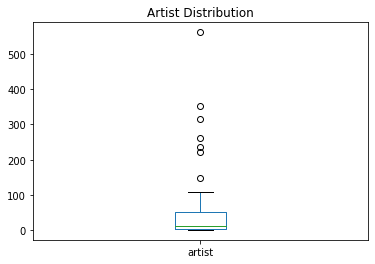

In [9]:
lyricsdf.artist.value_counts().plot(kind = "box", rot=0, title = "Artist Distribution")

This box plot is probably the cleanest way to visualize the artist distribution: there are many artists with only 1 or so songs in the data, as shown by the incredibly cramped 2nd quartile.  But there are also a handful of outliers with hundreds of songs present in the data.

## Data Cleaning

**Progress Report 2 starts here**

As I move forward with data cleaning, I will need to first take care of the "*Song Title* Lyrics" issue present at the beginning of most (if not all) of the lyrics in the dataset, then strip whitespace from the ends of the lyric text and handle "\n" within the lyric body.  I will also replace all empty strings "" with null values, so that they can be excluded from analysis later.  I will then take a closer look at remaining duplicates and try to weed out any non-lyrical entries.

In [10]:
# cycles through rows, removes the *Song Title* Lyrics from beginning
def removeTitle(df):
    i = 0
    while i != len(df):
        row = df.iloc[i]
        toRemove = row.title + " Lyrics"
        row.lyrics = row.lyrics.replace(toRemove, "")
        i = i+1

In [11]:
removeTitle(lyricsdf)

In [12]:
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,"\nTerrible things, always happening\nJust like..."
1,Abner Jay,Cocaine,\nFolk music is high-class music. There's a lo...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine\nRunning round my heart\nAnd ..."
3,Abner Jay,Don’t Mess with Me Baby,\nTerrible things; that's what's getting all t...
4,Abner Jay,I cried,"I, I cried\nI cried in the ni-ight\nOh please ..."


Let's get rid of those 202 empty strings and replace with null vlaues.

In [13]:
lyricsdf = lyricsdf.replace("", None)

In [14]:
len(lyricsdf[lyricsdf.lyrics == ""])

0

Note below that there are still duplicates.  After removing the song titles, lyrical entries like "Transcription in progress" and "Embed" are now identical, in addition to the None values added in.  It is difficult to tell, however, why some of these other entries are appearing as duplicates

In [15]:
lyricsdf[lyricsdf.lyrics.duplicated()].tail(20)

,artist,title,lyrics
23,The Red Krayola,Piece for Piano and Guitar,Historic locomotion in\nSectional activation\n...
33,The Red Krayola,The Jewels of thre Madonna,Neevr let it be said that this is swill\nI'm g...
36,The Red Krayola,Tina’s Gone to Have a Baby,The master tours the garden in a coach\nI see ...
10,The Shaggs,Shaggs’ Own Thing (Musical Version),"\nOh, the rich people want what the poor peopl..."
17,The Shaggs,Wheels,"What should I do?\nWhat should I do?\nTell me,..."
1,Tonetta,81 Inch Prime Ass (Tonetta),I'm going to tickle your ass\nWith my tongue\n...
79,Viper,"Hop It, Drop It","\nHop it, drop it\nDon't hurt it, work it\nHop..."
113,Viper,In the Life of the Top-Choice Assassin,"\nIn the life of a baller\nShot-caller, hater ..."
127,Viper,Jackers Mad,Transcription in progress by Viper Crackpostin...
156,Viper,No 1 Had A Clue,\nGirls love me cause I'm so real\nCause I'm l...


In [16]:
# strip whitespace from the beginning and end
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.strip("\n"))

In [17]:
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,"Terrible things, always happening\nJust like y..."
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine\nRunning round my heart\nAnd ..."
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...
4,Abner Jay,I cried,"I, I cried\nI cried in the ni-ight\nOh please ..."


In [18]:
# I noticed that .loc[] worked on indexes the restart for individual artists.  This doesn't seem super useful.
lyricsdf.loc[46]

,artist,title,lyrics
46,Ariel Pink,Function,What's the function of your soul\nWhat's the f...
46,Brian Wilson,Dream Angel,I'm holding you as you sleep\nI get this feeli...
46,Daniel Johnston,Despair Came Knocking,Despair came knocking at my door\nAnd I let he...
46,Gary Wilson,Lonely Holiday (Intro),Holiday\nA holiday\nIt's a holidayEmbed
46,Hasil Adkins,Woke Up This Morning,I got up this morning\nYeah when I woke up thi...
46,IceJJFish,So Sweet,Baby you look so sweet\nBaby girl put that bod...
46,Jandek,Comedy,Here's looking at you kid\nYou got the German ...
46,John Frusciante,Dying (I Don’t Mind),Here's one for the unknown past\nShooting into...
46,John Maus,Love Letters From Hell (2007),"Well I'm fillin in for Gracie Roberts tonight,..."
46,Moondog,Oboe Round,"No, the wheel was never invented\nNo, no, no, ..."


In [19]:
# fix the indexing -- it probably won't be super useful to have each individual musician's songs
# indexed from 0-n.  This makes sure everything has a unique index
lyricsdf = lyricsdf.reset_index()
lyricsdf = lyricsdf[['artist', 'title', 'lyrics']]
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,"Terrible things, always happening\nJust like y..."
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine\nRunning round my heart\nAnd ..."
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...
4,Abner Jay,I cried,"I, I cried\nI cried in the ni-ight\nOh please ..."


In [20]:
lyricsdf.tail()

,artist,title,lyrics
3383,William Shatner,Together,He says Phoenix\nPegasus\nGrecian urn\nMidwest...
3384,William Shatner,Twilight Zone,(Somewhere in a lonely hotel room\nThere's a g...
3385,William Shatner,Walking on the Moon,Giant steps are what you take\nI hope my legs ...
3386,William Shatner,What Have You Done,She was underwater\nIn the shadows\nWas it the...
3387,William Shatner,You’ll Have Time,"Live life, live life like you're gonna die\nBe..."


In [21]:
# William Shatner "You'll Have Time" ends in "2Embed"
lyricsdf.iloc[-1].lyrics[-50:]

' airplane crash\nCar wreck, a cap in your ass2Embed'

In [22]:
# Randomly samples from lyrics & shows ending, check what "Embed"s look like
embedtest = lyricsdf.lyrics.sample(5)
for lyrics in embedtest:
    print(lyrics[-50:])

r min hund Cerberos
Inte har han mossa i öratEmbed
us back in formation
The pack in formation...Embed
don, rock on Chicago
Raid, it kills bugs deadEmbed
the skull sure changes a man
Bye, Bye, BarbieEmbed
 me, i got the safe so im motherfucking sa-feEmbed


After running the code chunk above multiple times, I've seen a few features of the "Embed" issue at the tail of the lyrics:
- No space before "Embed"
- Occasionally (but rarely), there is a digit before (e.g., "1Embed")
    - After checking some lyrics on the Genius site, I found that this number corresponds to the "PYONG"s on the lyrics.  This is sort of like a favoriting/sharing function, but for now, it's sort of unimportant.
    
Both the "Embed" and the preceding digit, if present, should be removed.  There is some risk that removing the digit will delete a digit at the end of the lyrics, but I judge that, in this case, losing a digit is preferable to including extraneous data.


In [23]:
# Remove the nEmbed using a regex
def removeEmbed(df):
    i = 0
    while i != len(df):
        row = df.iloc[i]
        embed = row.lyrics
        row.lyrics = re.sub(r'\d*Embed', "", embed)
        #print(row.lyrics[-50:])
        i = i+1

In [24]:
removeEmbed(lyricsdf)

In [25]:
# replaces newlines with spaces, but maintains the line-break data in a separate column
lyricsdf["lyrics_lines"] = lyricsdf.lyrics
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\n", " "))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y..."
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...,Folk music is high-class music. There's a lott...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ..."
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...,Terrible things; that's what's getting all the...
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ..."


In [26]:
# The end is looking pretty good, too! No Embed, no newlines
for lyrics in lyricsdf.lyrics[:5]:
    print(lyrics[-50:])

it with you, honey Bring it with you when you come
heart And it runnin', oh it runnin' Round my brain
nd then running Lord, it's running Round my brain 
with me baby And I declare, I declare I am through
back tonight And then I'll kiss and hold you tight


Some lyrics are not in English characters.  While sampling, I saw at least one song written in Japanese characters.  I'll tag these in a separate "English_char" column, but won't remove them for now.  There is the possibility that there are foreign language songs written in English characters that won't be recognized by this step.  Given the nature of the data, I sense there may also be some "non-English" nonsense songs.  I'll leave these in, as well, and will leave them untagged (for now), under the assumption that they do not make up a good portion of the data.

In [27]:
# This is not English :)
lyricsdf.iloc[1915].lyrics

'En dag när jag gick i en skog Så tappade jag mina byxor Jag märkte det ej Men jag mötte en tjej Och hon tittade så konstigt på mig Men så sa hon hej ... ... Och sen så gick jag hem'

The code below was taken from this [stack overflow page](https://stackoverflow.com/questions/27084617/detect-strings-with-non-english-characters-in-python).  It should identify non-English characters not found in ASCII.

In [28]:
# [1915] is not English for sure
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [29]:
# Good job! That was, indeed, not English :)
isEnglish(lyricsdf.iloc[1915].lyrics)

False

In [30]:
lyricsdf["eng_chars_only"] = lyricsdf.lyrics.map(lambda x: isEnglish(x))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...,Folk music is high-class music. There's a lott...,True
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...,Terrible things; that's what's getting all the...,True
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True


In [31]:
# That's a lot of non-English songs. Hmm...
lyricsdf.eng_chars_only.value_counts()

True     2269
False    1119
Name: eng_chars_only, dtype: int64

In [32]:
# These look pretty English to me.
nonEng = lyricsdf[lyricsdf.eng_chars_only == False]
nonEng.lyrics.sample(10)

1747    Every night (the dark) passed by Sometimes the...
171     Here I am, my love, and I'm just a moment away...
2707    This is my favorite record store It is located...
539     Who’s that knocking at the door It’s the ghost...
454     While walking the streets late one night I saw...
298     I got a notion we come from the ocean and God ...
2257    The insecurity of crystalline political super-...
2706    (phone ringing) Hello, who's this? "It's your ...
3152    This band played at the Congress Theater About...
3119    This is a bad bus ride It is no fun at all It ...
Name: lyrics, dtype: object

In [33]:
# it looks like there are \u2005 characters (they don't appear as anything on the site)
lyricsdf.iloc[3175].lyrics

"This band rocked the Czar bar About 180 people were at the show The rock show was\u2005a\u2005rock 'n roll\u2005experience It was a great knockout  The Dollrods The\u2005Dollrods The Dollrods The Dollrods  The band played it on The band got down like a Magikist They can really rock the nation They can really jam the guitar  The Dollrods The Dollrods The Dollrods The Dollrods  The show was a rock 'n roller The jam session was a big rock 'n roll blast The jam session was kick ass show They can really knock it out The Dollrods The Dollrods The Dollrods The Dollrods  Rock over London, rock on Chicago Diet Pepsi, uh-huh!"

It looks like there may be a different kind of space formatting on some of the lyrics.  We'll replace them the same way the newlines were replaced.

In [34]:
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\u2005", " "))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("\u2005", " "))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...,Folk music is high-class music. There's a lott...,True
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...,Terrible things; that's what's getting all the...,True
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True


In [35]:
# Re-run the eng_chars_only column, see if .value_counts() has changed
lyricsdf["eng_chars_only"] = lyricsdf.lyrics.map(lambda x: isEnglish(x))
lyricsdf.eng_chars_only.value_counts()

True     2581
False     807
Name: eng_chars_only, dtype: int64

The number of songs with non-English characters has gone down significantly, but it's still worth checking to see if there are other whitespace characters (or similar issues) that may be causing over-tagging.

In [36]:
# Uh-oh.  Stil pretty English.
nonEng = lyricsdf[lyricsdf.eng_chars_only == False]
nonEng.lyrics.sample(10)

3269    My life is all brand new Ever since I met you ...
1496    Everyone's alike you now When it was right I m...
2457    Money game crazy My crib game crazy My model g...
131     ‏‏thginot nwod teG ‏‏thginot nwod teG ‏‏thgino...
1212    Then I came to see the man at the center of th...
525     Fly me to the moon I wanna leave here Fly me t...
596     Well she was just Well she was just 17 And you...
988     I don't feel love anymore I don't do love anym...
2982    Kick out the jams Kick them out like a light R...
2765    You are a nice friend You are my buddy You are...
Name: lyrics, dtype: object

In [37]:
# Starting to think maybe tagging non-English songs is a bit fruitless
# But that \u2005 space issue was a good catch, at least!
lyricsdf.iloc[1020].lyrics

'Why don’t you sell me two rhymes I want to tell you two times'

In [38]:
# Another space formatting issue
lyricsdf.iloc[2734].lyrics

"This band played at the Empty Bottle About two hundred fifty people were at the rock show The jam session was perfect The rock 'n roll burned a monkey up  Brain Kiss Brain Kiss Brain Kiss Brain Kiss  The band played it on The\u205fband\u205fgot\u205fdown like a\u205fMagikist The crowd roared\u205flike a lion The jam session whooped a llama's ass  Brain Kiss Brain Kiss Brain Kiss Brain Kiss  The show was over A lot of people met the band The rock 'n roll show was awesome It whipped a pony's ass with a belt Brain Kiss Brain Kiss Brain Kiss Brain Kiss  Rock over London, rock on Chicago Radio Shack, you got questions, we got answers"

In [39]:
# Fix the \u205f spacing
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\u205f", " "))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("\u205f", " "))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...,Folk music is high-class music. There's a lott...,True
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...,Terrible things; that's what's getting all the...,True
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True


In [40]:
# count decreases, yet again!
lyricsdf["eng_chars_only"] = lyricsdf.lyrics.map(lambda x: isEnglish(x))
lyricsdf.eng_chars_only.value_counts()

True     2794
False     594
Name: eng_chars_only, dtype: int64

In [41]:
# Catching a lot more actual non-English lyrics, so we might be close to catching all of the formatting issues.
nonEng = lyricsdf[lyricsdf.eng_chars_only == False]
nonEng.lyrics.sample(10)

42      Turn me on my friend Don't  put your fingers o...
490     You might wonder Where I’m coming from But you...
130     ‏‏thginot nwod teG ‏‏thginot nwod teG ‏‏thgino...
1891    Jag vet en liten stuga där vi kunde bo Jag vet...
585     She invited me to a pity party Every hour ever...
1013    There's a dance next Friday over at the gym Ar...
1874    You white trash hillbilly trick They been into...
1886    Du är inte nån att ha till vän För du är en id...
1894    Min spargris den är så fed Jag har stoppat den...
1004    Where's Rodan? He's on monster island What's h...
Name: lyrics, dtype: object

In [42]:
lyricsdf.iloc[1795].lyrics

'High on a rocky ledge lives a mädel, Edelweiß Shy as a shadow, lovely as lace, and cold as ice High on a rocky ledge, I pledge my love to her Ev\'ry time I climb up to Paradise How many times I\'ve been up to see her, goodness knows Huffing and puffing, dressed in the warmest climbing clothes How many chances would be taken in my Hopeless pursuit of the Schnee-Mädel-Edelweiß Then spoke a spirit, "If you would win your Lady Love There\'s only one way: fall to your death from high above You will begin to grow in snow beside the one You have waited for to be mated with" Now, I\'m an Edel, vice to my Mädel, Edelweiß Dying to be with her wasn\'t any sacrifice We\'re so deliriously happy on our ledge Where I pledge my love to my Lady Fair You who are climbing breathless to see me and my love Snow flowers growing fonder on Lover\'s Ledge above If you\'ve the yen to pluck, then pluck us both For we who have lived as one wish to die as one'

Note that the straight apostrophe (') is being escaped here.  In other lyrics, the apostrophe is formatted as the curly ’.  I will try standardizing the apostrophe to the curly version below.

In [43]:
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\'", "’"))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("\'", "’"))
lyricsdf.iloc[1795].lyrics

'High on a rocky ledge lives a mädel, Edelweiß Shy as a shadow, lovely as lace, and cold as ice High on a rocky ledge, I pledge my love to her Ev’ry time I climb up to Paradise How many times I’ve been up to see her, goodness knows Huffing and puffing, dressed in the warmest climbing clothes How many chances would be taken in my Hopeless pursuit of the Schnee-Mädel-Edelweiß Then spoke a spirit, "If you would win your Lady Love There’s only one way: fall to your death from high above You will begin to grow in snow beside the one You have waited for to be mated with" Now, I’m an Edel, vice to my Mädel, Edelweiß Dying to be with her wasn’t any sacrifice We’re so deliriously happy on our ledge Where I pledge my love to my Lady Fair You who are climbing breathless to see me and my love Snow flowers growing fonder on Lover’s Ledge above If you’ve the yen to pluck, then pluck us both For we who have lived as one wish to die as one'

In [44]:
# the ellipsis here is specially formatted as "…"
lyricsdf.iloc[2522].lyrics

'To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome  Don’t get sent home In a body bag for not leaving me alone I don’t care what you got goin on Cuz i already paid and my body is every bone Yea i know, that I’m conceited and arrogant And that can be repeated But that’s just my personality And it’s magnified cuz im a G So i ain’t trying to hear what they gotta say Like they ? for a jack, so i ? the gun spray These marks are fucking up my day Rollin up asking if they may Ask me a question about some bullshit Bitch ass nigga you better get a grip I’m tired of playing with these faggots I’m bout to get my four and let you snitch niggas have it To yo dome with the chrome To yo dome with the chrome To yo dome with the chro

In [45]:
# replace special ellipsis with plain "..."
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("…", "..."))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("…", "..."))
lyricsdf.iloc[2522].lyrics[-400:-200]

'ck on a mission But wondering when this green gon’ stop coming in I’ll go... To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with'

I'm going to search the lyrics for "\\" to see if there are any other formatting issues present.

In [46]:
# It look like there are not "\" formatting issues left
i=0
while i != len(lyricsdf):
    x = re.findall(r"\\", lyricsdf.lyrics[i])
    if x: print(x)
    i = i+1

From earlier, I remember seeing "Transcription in progress ..." lyric entries.  I'd like to set these as null.

In [47]:
i=0
while i != len(lyricsdf):
    x = re.findall(r"Transcription", lyricsdf.lyrics[i])
    if x: print(x)
    i = i+1

['Transcription']
['Transcription']
['Transcription']
['Transcription']
['Transcription']
['Transcription']


In [48]:
# There are 6!
i=0
transcript_del = []
while i != len(lyricsdf):
    if "Transcription in progress" in lyricsdf.iloc[i].lyrics:
        transcript_del.append(i)
    i= i+1

In [49]:
for i in transcript_del:
    print(lyricsdf.iloc[i].lyrics)

Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins


In [50]:
# They're all the same string, so:
lyricsdf.lyrics = lyricsdf.lyrics.replace("Transcription in progress by Viper Crackposting admins", None)

In [51]:
i=0
while i != len(lyricsdf):
    x = re.findall(r"Transcription", lyricsdf.lyrics[i])
    if x: print(x)
    i = i+1

Because some English songs contain non-English characters, the eng_chars_only column isn't very useful at the moment.  However, it did help significantly with catching other formatting issues that I had not anticipated.  I will consider the data clean for the moment.

Note, also, that the data remains very Zipfian in terms of artists.  For now, I will leave it as such.  As a disclaimer, the Wesley Willis skew sort of represents the "poster child" of outsider music, so the analysis may feed into the ideology surrounding the genre.

In [52]:
# returns % of characters that are non-English
def nonEngChars(s):
    i = 0  # counter for non-Eng chars
    for c in s:  # iterate through string
        try:
            c.encode(encoding='utf-8').decode('ascii')
        except UnicodeDecodeError:
            i+=1  # increment if char causes error
    if len(s) > 0:
        return i/len(s)
    else:
        return np.nan

In [53]:
# [1915] is not English for sure
nonEngChars(lyricsdf.iloc[1915].lyrics)

0.044444444444444446

In [54]:
lyricsdf["percent_non_english"] = lyricsdf.lyrics.map(lambda x: nonEngChars(x))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True,0.009918
1,Abner Jay,Cocaine,Folk music is high-class music. There’s a lott...,Folk music is high-class music. There’s a lott...,True,0.023657
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True,0.016551
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that’s what’s getting all the...,Terrible things; that’s what’s getting all the...,True,0.010326
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True,0.004902


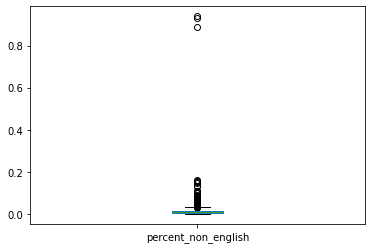

In [55]:
# Looks like a good number are on the low end, but some are on the higher end.
# Potentially missing lyric data!
lyricsdf.percent_non_english.plot(kind='box')
plt.show()

In [56]:
# These look pretty English to me.
nonEng = lyricsdf[lyricsdf.percent_non_english > 0.08]
nonEng

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english
12,Ajdar,Şahdamar,"Şah şah şah Dam dam dam Ar ar ar Şahdamar, ş...",Şah şah şah\nDam dam dam\nAr ar ar\nŞahdamar...,False,0.089683
43,Ariel Pink,Corazon Que,Corazón qué Corazón qué Corazón qué Corazón ...,Corazón qué\nCorazón qué\nCorazón qué \n\nCora...,False,0.153846
130,Ariel Pink,Red Room,‏‏thginot nwod teG ‏‏thginot nwod teG ‏‏thgino...,‏‏thginot nwod teG\n‏‏thginot nwod teG\n‏‏thgi...,False,0.110372
131,Ariel Pink,Red Vinyl,‏‏thginot nwod teG ‏‏thginot nwod teG ‏‏thgino...,‏‏thginot nwod teG\n‏‏thginot nwod teG\n‏‏thgi...,False,0.110372
132,Ariel Pink,Reminiscences,‏‏thginot nwod teG ‏‏thginot nwod teG ‏‏thgino...,‏‏thginot nwod teG\n‏‏thginot nwod teG\n‏‏thgi...,False,0.110372
147,Ariel Pink,Starry Eyes,​raw ot oG,​raw ot oG,False,0.100000
1746,Les Rallizes Dénudés,Enter the Mirror,あらゆる夜（闇）を通り過ぎてきた 時々ひとりで あらゆる闇（夜）を通り過ぎてきた お前といっ...,あらゆる夜（闇）を通り過ぎてきた\n時々ひとりで\nあらゆる闇（夜）を通り過ぎてきた\nお前...,False,0.928571
1748,Les Rallizes Dénudés,The Last One,心の裏側で喜びに震え 生きていることさえ忘れてしまった 僕が１人で歩くのは、だれもいない波の...,心の裏側で喜びに震え 生きていることさえ忘れてしまった\n僕が１人で歩くのは、だれもいない波...,False,0.159120
1749,Les Rallizes Dénudés,White Awakening,パターンA： ----------- 私の春が始まった時 あなただけしか欲しくなかった 風の...,パターンA：\n-----------\n私の春が始まった時 あなただけしか欲しくなかった\...,False,0.888112
1751,Les Rallizes Dénudés,夜、暗殺者の夜 (Night of the Assassins),Japanese (Original) とても深い夜 まるで誰かを殺したみたい 何がお前の飢...,Japanese (Original)\nとても深い夜 まるで誰かを殺したみたい\n何がお前...,False,0.158151


In [57]:
lyricsdf.iloc[2242].lyrics #1800, 1232, 1003, 1989

'Let’s get busy (let’s get busy) Let’s get busy (let’s get busy) Let’s get hot (let’s get hot) Let’s be cool (let’s be cool) Let’s get crooked, let’s get crazy Get it together and let’s get busy  I’m feelin good, let’s have a party I’m on the phone, callin’ my homies Come have some fun, we’ll be jammin’ Bring some food, but don’t bring beer now Bring your pajamas and your boom box We’ll rock the house and dance our socks off  Let’s get busy (let’s get busy) Let’s get busy (let’s get busy) Let’s get hot (let’s get hot) Let’s be cool (let’s be cool) Let’s get crooked, let’s get crazy Get it together and let’s get busy  I’m havin’ fun, eatin’ pizza I see my boyfriend, I see my girlfriend Let’s get up and start dancin’ Make some noise, turn up the music Let’s not stop until we drop Let’s keep goin’ til the break of dawn Let’s get busy (let’s get busy) Let’s get busy (let’s get busy) Let’s get hot (let’s get hot) Let’s be cool (let’s be cool) Let’s get crooked, let’s get crazy Get it togeth

In [58]:
import spacy

Using the spaCy documentation and this [stack overflow page](https://stackoverflow.com/questions/66712753/how-to-use-languagedetector-from-spacy-langdetect-package), I'll create a new column to store the language detected and the confidence score.

In [59]:
from spacy_langdetect import LanguageDetector
from spacy.language import Language

def get_lang_detector(nlp, name):
    return LanguageDetector()

# This just outputs an example, to show that the detector is working
nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)
text = 'This is an english text.'
doc = nlp(text)
print(doc._.language)

{'language': 'en', 'score': 0.9999961889626323}


In [60]:
def langDetect(nlp, text):
    doc = nlp(text)
    return doc._.language

lyricsdf["lang_detect"] = lyricsdf.lyrics.map(lambda x: langDetect(nlp, x))

In [61]:
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True,0.009918,"{'language': 'en', 'score': 0.9999969507477495}"
1,Abner Jay,Cocaine,Folk music is high-class music. There’s a lott...,Folk music is high-class music. There’s a lott...,True,0.023657,"{'language': 'en', 'score': 0.999994987074969}"
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True,0.016551,"{'language': 'en', 'score': 0.9999989934171772}"
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that’s what’s getting all the...,Terrible things; that’s what’s getting all the...,True,0.010326,"{'language': 'en', 'score': 0.9999968750669035}"
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True,0.004902,"{'language': 'en', 'score': 0.9999974762058403}"


In [62]:
# lang_detect is a short dictionary, containing 'language' and 'score' as keys
# extract 'language'

lyricsdf["lang"] = lyricsdf.lang_detect.map(lambda x: x["language"])

In [63]:
lyricsdf.lang.value_counts()

en         3237
sv           59
UNKNOWN      29
tl            8
fr            6
so            6
id            5
cy            5
af            5
ja            3
no            3
es            3
nl            3
tr            3
sw            2
it            2
ca            2
pt            2
et            1
pl            1
sl            1
sk            1
hr            1
Name: lang, dtype: int64

In [86]:
non_eng = lyricsdf[lyricsdf.lang != "en"]
non_eng.sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang,tokens,token_ct,type_ct,TTR
1918,Philemon Arthur And The Dung,Om Jag Hade Pjäxor,Blommorna på ängen växer Och det gör ju även j...,Blommorna på ängen växer\nOch det gör ju även ...,False,0.079365,"{'language': 'sv', 'score': 0.9999960913009038}",sv,"[blommorna, på, ängen, växer, och, det, gör, j...",24,21,0.875000
1304,Jandek,Sung,I’m looking at a blank page Looking at a blank...,I’m looking at a blank page\nLooking at a blan...,False,0.028037,"{'language': 'tl', 'score': 0.7142837600951975}",tl,"[i, ’, m, looking, at, a, blank, page, looking...",29,16,0.551724
1778,Moondog,Chant,Bells are ringing dinga linga linga linga ling...,Bells are ringing dinga linga linga linga ling...,True,0.004762,"{'language': 'tl', 'score': 0.9999963715688729}",tl,"[bells, are, ringing, dinga, linga, linga, lin...",42,21,0.500000
223,Brian Wilson,Deck The Halls,"Deck the halls with boughs of holly Fa, la, la...","Deck the halls with boughs of holly\nFa, la, l...",True,0.001616,"{'language': 'es', 'score': 0.8571186731985584}",es,"[deck, the, halls, with, boughs, of, holly, fa...",460,62,0.134783
2399,Tonetta,My 10$ Axe,Yeah Yeah Yeah ... Jump Jump Jump ...,Yeah\nYeah\nYeah\n...\nJump\nJump\nJump\n...,True,0.000000,"{'language': 'id', 'score': 0.9999969969495115}",id,"[yeah, yeah, yeah, ..., jump, jump, jump, ...]",8,3,0.375000


In [99]:
lyricsdf[lyricsdf.lang == "en"].sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang,tokens,token_ct,type_ct,TTR
480,Daniel Johnston,Casper the Friendly Ghost,The coyote goes: Ah-ha-ha-ha-ha-ha-ha-ha! He ...,The coyote goes:\nAh-ha-ha-ha-ha-ha-ha-ha!\n\n...,False,0.005959,"{'language': 'en', 'score': 0.9999960606697877}",en,"[the, coyote, goes, :, ah-ha-ha-ha-ha-ha-ha-ha...",177,96,0.542373
2596,Viper,Secret Keepa,"Days are warm, nights are cold But wit this mo...","Days are warm, nights are cold\nBut wit this m...",True,0.018118,"{'language': 'en', 'score': 0.9999974939108913}",en,"[days, are, warm, ,, nights, are, cold, but, w...",433,157,0.362587
667,Daniel Johnston,Party,Don’t wanna scare you Don’t wanna waste you Ju...,Don’t wanna scare you\nDon’t wanna waste you\n...,True,0.013793,"{'language': 'en', 'score': 0.9999962816777087}",en,"[don, ’, t, wan, na, scare, you, don, ’, t, wa...",371,138,0.371968
2285,The Red Krayola,Seven Compartments,Seven compartments exactly As a series of logi...,Seven compartments exactly\nAs a series of log...,False,0.011494,"{'language': 'en', 'score': 0.999998829146396}",en,"[seven, compartments, exactly, as, a, series, ...",101,70,0.693069
535,Daniel Johnston,Funeral Girl,I knew a girl at the funeral She said she was ...,I knew a girl at the funeral\nShe said she was...,False,0.006691,"{'language': 'en', 'score': 0.9999965157845268}",en,"[i, knew, a, girl, at, the, funeral, she, said...",297,115,0.387205


In [109]:
# Check some of the less frequent languages
lyricsdf[lyricsdf.lang.isin(['ja', 'no', 'es', 'nl', 'tr', 'sw', 'it', 'ca', 'et', 'pt', 'pl', 'sl', 'sk', 'hr'])].sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang,tokens,token_ct,type_ct,TTR
1749,Les Rallizes Dénudés,White Awakening,パターンA： ----------- 私の春が始まった時 あなただけしか欲しくなかった 風の...,パターンA：\n-----------\n私の春が始まった時 あなただけしか欲しくなかった\...,False,0.888112,"{'language': 'ja', 'score': 0.9999999839489948}",ja,"[パターンa：, --, --, --, --, --, -, 私の春が始まった時, あなた...",45,31,0.688889
93,Ariel Pink,Leggos,Legos Legos Legos Legos Toys for boys Cars and...,Legos\nLegos\nLegos\nLegos\nToys for boys\nCar...,False,0.014634,"{'language': 'ca', 'score': 0.857140641537839}",ca,"[legos, legos, legos, legos, toys, for, boys, ...",41,14,0.341463
452,Damião Experiença,Que Dor Que Eu Sinto,- Tá gravando. Título: - Praneta lamma no univ...,- Tá gravando. Título:\n- Praneta lamma no uni...,False,0.024928,"{'language': 'pt', 'score': 0.5714273597075984}",pt,"[-, tá, gravando, ., título, :, -, praneta, la...",148,107,0.722973
1260,Jandek,Plenty,You must you must keep listening I don’t know ...,You must you must keep listening\nI don’t know...,True,0.012658,"{'language': 'et', 'score': 0.4285710840595563}",et,"[you, must, you, must, keep, listening, i, don...",36,11,0.305556
106,Ariel Pink,Nazi Love,Nazi Nazi Nazi Nazi love Nazi Nazi Nazi (Not N...,Nazi\nNazi\nNazi\nNazi love\nNazi\nNazi\nNazi\...,False,0.037037,"{'language': 'hr', 'score': 0.9999951319580163}",hr,"[nazi, nazi, nazi, nazi, love, nazi, nazi, naz...",42,20,0.476190


In [110]:
# Check out some of the more frequent languages:
lyricsdf[lyricsdf.lang.isin(['fr', 'so', 'tl', 'id', 'cy', 'af'])].sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang,tokens,token_ct,type_ct,TTR
1304,Jandek,Sung,I’m looking at a blank page Looking at a blank...,I’m looking at a blank page\nLooking at a blan...,False,0.028037,"{'language': 'tl', 'score': 0.7142837600951975}",tl,"[i, ’, m, looking, at, a, blank, page, looking...",29,16,0.551724
2399,Tonetta,My 10$ Axe,Yeah Yeah Yeah ... Jump Jump Jump ...,Yeah\nYeah\nYeah\n...\nJump\nJump\nJump\n...,True,0.000000,"{'language': 'id', 'score': 0.9999969969495115}",id,"[yeah, yeah, yeah, ..., jump, jump, jump, ...]",8,3,0.375000
130,Ariel Pink,Red Room,‏‏thginot nwod teG ‏‏thginot nwod teG ‏‏thgino...,‏‏thginot nwod teG\n‏‏thginot nwod teG\n‏‏thgi...,False,0.110372,"{'language': 'cy', 'score': 0.9999988646748498}",cy,"[‏‏thginot, nwod, teg, ‏‏thginot, nwod, teg, ‏...",167,44,0.263473
1923,Philemon Arthur And The Dung,Polismannen,En polisman i gatan står En törn av en bil han...,En polisman i gatan står\nEn törn av en bil ha...,False,0.027132,"{'language': 'id', 'score': 0.8571412483283323}",id,"[en, polisman, i, gatan, står, en, törn, av, e...",60,21,0.350000
823,Gary Wilson,Lonely Holiday (Intro),Holiday A holiday It’s a holiday,Holiday\nA holiday\nIt’s a holiday,True,0.031250,"{'language': 'so', 'score': 0.8571378739725903}",so,"[holiday, a, holiday, it, ’, s, a, holiday]",8,5,0.625000


The above lists are samples, but I've skimmed through the full non-English lists. Note that this isn't a perfect solution.  Many English lyrics have been misidentified as foreign languages, as shown below with "Deck the Halls."  It appears that too many "la"s has classified this one as Spanish.  However, it's easier to trust that the remaining data is, indeed, English, which could be worth the loss of some data.

In [66]:
print("language:", lyricsdf.iloc[223].lang, "\n", lyricsdf.iloc[223].lyrics)

language: es 
 Deck the halls with boughs of holly Fa, la, la, la, la, la, la, la, la ’Tis the season to be jolly Fa, la, la, la, la, la, la, la, la Don we now our gay apparel Fa, la, la, la, la, la, la, la, la Troll the ancient Yule tide carol Fa, la, la, la, la, la, la, la, la See the blazing Yule before us Fa, la, la, la, la, la, la, la, la Strike the harp and join the chorus Fa, la, la, la, la, la, la, la, la Follow me in merry measure Fa, la, la, la, la, la, la, la, la While I tell of Yule tide treasure Fa, la, la, la, la, la, la, la, la Fast away the old year passes Fa, la, la, la, la, la, la, la, la Hail the new, ye lads and lasses Fa, la, la, la, la, la, la, la, la Sing we joyous, all together Fa, la, la, la, la, la, la, la, la Heedless of the wind and weather Fa, la, la, la, la, la, la, la, la Deck the halls with boughs of holly Fa, la, la, la, la, la, la, la, la ’Tis the season to be jolly Fa, la, la, la, la, la, la, la, la Don we now our gay apparel Fa, la, la, la, la, la, l

In [84]:
lyricsdf.iloc[223].lang_detect

{'language': 'es', 'score': 0.8571186731985584}

In [107]:
# Note that all 59 of these lyrics are Swedish
# Only a sample shown below
lyricsdf[lyricsdf.lang == "sv"].sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang,tokens,token_ct,type_ct,TTR
1914,Philemon Arthur And The Dung,Mor Anka,Mor Anka är lite konstig Hon skjuter hästar tr...,Mor Anka är lite konstig\nHon skjuter hästar t...,False,0.030997,"{'language': 'sv', 'score': 0.9999961600886023}",sv,"[mor, anka, är, lite, konstig, hon, skjuter, h...",153,107,0.699346
1878,Philemon Arthur And The Dung,Blomman,"-Oj oj oj, det är söndagmorgon och klockan är ...","-Oj oj oj, det är söndagmorgon och klockan är ...",False,0.048348,"{'language': 'sv', 'score': 0.9999974823074814}",sv,"[-oj, oj, oj, ,, det, är, söndagmorgon, och, k...",277,86,0.310469
1926,Philemon Arthur And The Dung,Skolsången,En vacker sång jag lärde mig i skola Den var s...,En vacker sång jag lärde mig i skola\nDen var ...,False,0.057377,"{'language': 'sv', 'score': 0.9999982786372654}",sv,"[en, vacker, sång, jag, lärde, mig, i, skola, ...",229,96,0.419214
1916,Philemon Arthur And The Dung,Naturen,Idag är den 13e mars och vi har just skrivit e...,Idag är den 13e mars och vi har just skrivit e...,False,0.065860,"{'language': 'sv', 'score': 0.9999979196683842}",sv,"[idag, är, den, 13e, mars, och, vi, har, just,...",143,55,0.384615
1883,Philemon Arthur And The Dung,Djurvisa,En kossa på ängen Den kommer gående och säger ...,En kossa på ängen\nDen kommer gående och säger...,False,0.132512,"{'language': 'sv', 'score': 0.9999982257280964}",sv,"[en, kossa, på, ängen, den, kommer, gående, oc...",165,23,0.139394


For the analysis, I will remove those languages which I know are entirely non-English lyrics, including Swedish ('sv') and Japanese ('ja').  The other languages identified are not so definitively English or non-English, so I will leave them in the dataset for analysis.  Given that there were 59 Swedish songs identified, it seems worthwhile to remove them.

If it seems as if the non-English data may be confounding the analysis, the songs identified as English ('en') appear to be identified as such reliably and can be used for a smaller analysis.  However, I would like to avoid doing this, since many of the stranger, non-sense lyrics that could characterize outsider music have been identified as non-English.

In [123]:
# And UNKNOWN language is just the empty string lyrics!
lyricsdf[lyricsdf.lang == "UNKNOWN"].sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang,tokens,token_ct,type_ct,TTR
855,Gary Wilson,The Snow,,,True,NaN,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN,[],0,0,NaN
1444,John Frusciante,Hew Branderson,,,True,NaN,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN,[],0,0,NaN
1554,John Frusciante,Untitled #13,,,True,NaN,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN,[],0,0,NaN
1377,John Frusciante,Anea 18,,,True,NaN,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN,[],0,0,NaN
839,Gary Wilson,Shauna Made Me Cry,,,True,NaN,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN,[],0,0,NaN


In [124]:
lyricsdf = lyricsdf[~lyricsdf.lang.isin(['sv', 'ja', 'UNKNOWN'])]

## Beginning Analysis
The lyrics need to be tokenized so that they can be analyzed at the word-level.

In [125]:
# tokenize, then lowercase tokens
lyricsdf["tokens"] = lyricsdf.lyrics.map(lambda x: nltk.word_tokenize(x))
lyricsdf.tokens = lyricsdf.tokens.map(lambda x: [word.lower() for word in x])
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang,tokens,token_ct,type_ct,TTR
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True,0.009918,"{'language': 'en', 'score': 0.9999969507477495}",en,"[terrible, things, ,, always, happening, just,...",429,143,0.333333
1,Abner Jay,Cocaine,Folk music is high-class music. There’s a lott...,Folk music is high-class music. There’s a lott...,True,0.023657,"{'language': 'en', 'score': 0.999994987074969}",en,"[folk, music, is, high-class, music, ., there,...",501,195,0.389222
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True,0.016551,"{'language': 'en', 'score': 0.9999989934171772}",en,"[cocaine, ,, cocaine, running, round, my, hear...",443,169,0.381490
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that’s what’s getting all the...,Terrible things; that’s what’s getting all the...,True,0.010326,"{'language': 'en', 'score': 0.9999968750669035}",en,"[terrible, things, ;, that, ’, s, what, ’, s, ...",733,265,0.361528
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True,0.004902,"{'language': 'en', 'score': 0.9999974762058403}",en,"[i, ,, i, cried, i, cried, in, the, ni-ight, o...",152,51,0.335526


In [126]:
lyricsdf["token_ct"] = lyricsdf.tokens.map(len)
lyricsdf["type_ct"] = lyricsdf.tokens.map(lambda x: len(set(x)))
lyricsdf["TTR"] = lyricsdf.type_ct / lyricsdf.token_ct
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang,tokens,token_ct,type_ct,TTR
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True,0.009918,"{'language': 'en', 'score': 0.9999969507477495}",en,"[terrible, things, ,, always, happening, just,...",429,143,0.333333
1,Abner Jay,Cocaine,Folk music is high-class music. There’s a lott...,Folk music is high-class music. There’s a lott...,True,0.023657,"{'language': 'en', 'score': 0.999994987074969}",en,"[folk, music, is, high-class, music, ., there,...",501,195,0.389222
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True,0.016551,"{'language': 'en', 'score': 0.9999989934171772}",en,"[cocaine, ,, cocaine, running, round, my, hear...",443,169,0.381490
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that’s what’s getting all the...,Terrible things; that’s what’s getting all the...,True,0.010326,"{'language': 'en', 'score': 0.9999968750669035}",en,"[terrible, things, ;, that, ’, s, what, ’, s, ...",733,265,0.361528
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True,0.004902,"{'language': 'en', 'score': 0.9999974762058403}",en,"[i, ,, i, cried, i, cried, in, the, ni-ight, o...",152,51,0.335526


In [127]:
lyricsdf.token_ct.describe()

count    3297.000000
mean      212.114346
std       160.853562
min         1.000000
25%       117.000000
50%       172.000000
75%       262.000000
max      2155.000000
Name: token_ct, dtype: float64

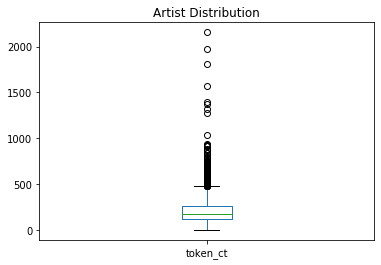

In [119]:
# Let's take a quick look at the token_ct distribution
# NOTE: This still includes non-English data
lyricsdf.token_ct.plot(kind = "box", rot=0, title = "Artist Distribution")

There are some lyrics with around 2,000 tokens!  This seems unusual.  Let's investigate... could this be a tokenization issue?  Note that, on average, most songs are about 200 tokens long, which seems a bit more reasonable.

In [120]:
lyricsdf[lyricsdf.token_ct >= 2000]

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang,tokens,token_ct,type_ct,TTR
1242,Jandek,One Last Chance,I need another chance I need one last chance I...,I need another chance\nI need one last chance\...,True,0.012782,"{'language': 'en', 'score': 0.9999952910114128}",en,"[i, need, another, chance, i, need, one, last,...",2155,325,0.150812


In [121]:
lyricsdf.iloc[1242].lyrics

'I need another chance I need one last chance I’ve looked at myself I don’t like what I see I need another chance To try to do it right I can do it right If I have the strength If I keep my will If I direct my body I can do it right I need another chance Because I looked at myself And I’m goin wrong But I can do it right You can show me how Like you did before When I really needed to do it right I was in a fix before I was really in trouble It was sharp and quick It took me by surprise And you helped me then It was a matter of time But this time it’s different It’s been a growing thing It wasn’t sharp and quick No no no no It didn’t take me by surprise It came along slow and soft It crept and I saw it all along the way It came on bit by bit And I knew it all along The only difference is now It’s gone too far It’s gone too far It almost seems irreversible I need another chance I wanna do it right Cause when I looked at myself It was going all wrong I’ve got to change my style I’ve got t

This is actually pretty long.  (It's a 30-minute video on [YouTube](https://www.youtube.com/watch?v=nbn1Ei7Jfkc)!

In [128]:
lyricsdf.describe()

,percent_non_english,token_ct,type_ct,TTR
count,3297.000000,3297.000000,3297.000000,3297.000000
mean,0.011493,212.114346,79.261753,0.430361
std,0.011190,160.853562,48.009737,0.157703
min,0.000000,1.000000,1.000000,0.033708
25%,0.004184,117.000000,50.000000,0.321121
50%,0.009524,172.000000,70.000000,0.414474
75%,0.016083,262.000000,98.000000,0.512821
max,0.159120,2155.000000,464.000000,1.000000


In [134]:
lyricsdf.artist.value_counts()[:20]

Wesley Willis       561
Jandek              351
Daniel Johnston     315
Viper               261
Brian Wilson        237
John Frusciante     212
Ariel Pink          145
R. Stevie Moore     109
John Maus            97
Syd Barrett          92
Moondog              86
Gary Wilson          85
Roky Erickson        81
IceJJFish            57
Wild Man Fischer     54
William Shatner      50
Hasil Adkins         47
The Red Krayola      41
William Hung         40
Tonetta              31
Name: artist, dtype: int64

In [156]:
artists_to_plot = lyricsdf.artist.value_counts()[:35]
few_artist = lyricsdf.artist.value_counts()[35:]

sum = 0
for y in few_artist:
    sum = sum +y
sum
artists_to_plot.concat(pandas.Series(sum))

AttributeError: 'Series' object has no attribute 'concat'

After cleaning up the data, Wesley Willis is still at the top of the artist-count list, followed by 7 artists with song volumes of the same magnitude (in the 100s).